# Deliverables:

- Submit two files that have been named in the following manner: <font color=red>YourLastName_Exercise_1</font>  and that includes the following files:

    - An HTML file that includes your source code and output. Make sure you have run your python code before you create the HTML file.
    - Your ipynb script that includes your source code and output.

# Objectives:

In this exercise, you will:

 - Use Jupyter notebook to run ipynb script
 - Learning about pickle
 - Use different data types to store and process data
 - explore Pandas - documentation: https://pandas.pydata.org/




<div class="alert alert-block alert-warning">  
    <b>Readings this week:</b><br>
    Python for Data Analysis - Chapters 1, 5, 6<br>
    Introduction to Python - Chapter 3
  
 
 </div>

In [4]:
# import libraries
import pandas as pd
import numpy as np

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Pandas
Pandas - is built on top of NumPy and contains high-level data structures and manipulation tools to make data analysis faster and easier.<br>

Pandas gives us two new data structures:
1. Series - one dimensional array-like object which contains an array of any type of data. A Series also has built in data labels called an index. A Series is a fixed-length, ordered dictionary (dict) which will map its index values to its data values. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
2. DataFrame - is a tabular, spread-sheet like structure which has an ordered structure of columns; the columns can be of different data types.  The DataFrame has both a row and column index. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)



In [5]:
# Series
data = pd.Series([113,96,108,109])
# check out what we created
type(data)

print(40*'=')
# shows the index and the value
data

print(40*'=')
data.values

print(40*'=')
data.index

pandas.core.series.Series

0    113
1     96
2    108
3    109
dtype: int64

array([113,  96, 108, 109])

RangeIndex(start=0, stop=4, step=1)

In [6]:
# lets give the Series a more detailed index
# numbers show millions of twitter followers
data2 = pd.Series([113,96,108,109], index=['Obama','Rihanna','Perry','Bieber'])

# show outcome
type(data2)

print(40*'=')
data2

print(40*'=')
data2.values

print(40*'=')
data2.index

pandas.core.series.Series

Obama      113
Rihanna     96
Perry      108
Bieber     109
dtype: int64

array([113,  96, 108, 109])

Index(['Obama', 'Rihanna', 'Perry', 'Bieber'], dtype='object')

In [7]:
# look at specific elements of array
data2['Rihanna']

print(40*'=')
data2[data2 > 100]

96

Obama     113
Perry     108
Bieber    109
dtype: int64

In [8]:
# can use a data dictionary to create a Series
dictionary = {'Swift' : 86,
          'Ronaldo': 83,
          'Gaga': 81,
          'DeGeneres': 79}

data3 = pd.Series(dictionary)

# look at what you created
data3

print(40*'=')
data3.index

Swift        86
Ronaldo      83
Gaga         81
DeGeneres    79
dtype: int64

Index(['Swift', 'Ronaldo', 'Gaga', 'DeGeneres'], dtype='object')

## DataFrames

In [9]:
# one way to create a DataFrame is from a dictionary
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
dictionary = {'person': ['Obama','Rihanna','Perry','Bieber'],
              'twitter': [113,96,108,109],
              'career' : ['Politics','Singer','Singer','Singer']
             }

df = pd.DataFrame(dictionary)
# show dataframe
df


,person,twitter,career
0,Obama,113,Politics
1,Rihanna,96,Singer
2,Perry,108,Singer
3,Bieber,109,Singer


In [10]:
# look at column of df
df['person']

0      Obama
1    Rihanna
2      Perry
3     Bieber
Name: person, dtype: object

In [11]:
# can refer to column this way too 
# note that format df.column will only work if the column name does not have a space
df.career

0    Politics
1      Singer
2      Singer
3      Singer
Name: career, dtype: object

In [12]:
# can reference by index
df.loc[0]

person        Obama
twitter         113
career     Politics
Name: 0, dtype: object

In [13]:
# sorting
df.sort_index()

# or can sort by other axis
df.sort_index(axis=1)

,person,twitter,career
0,Obama,113,Politics
1,Rihanna,96,Singer
2,Perry,108,Singer
3,Bieber,109,Singer


,career,person,twitter
0,Politics,Obama,113
1,Singer,Rihanna,96
2,Singer,Perry,108
3,Singer,Bieber,109


In [14]:
# sorting
df.sort_index(ascending = False)

,person,twitter,career
3,Bieber,109,Singer
2,Perry,108,Singer
1,Rihanna,96,Singer
0,Obama,113,Politics


In [15]:
# can sort by multiple columns
df.sort_values(by = ['career','person'])

,person,twitter,career
0,Obama,113,Politics
3,Bieber,109,Singer
2,Perry,108,Singer
1,Rihanna,96,Singer


In [16]:
# you can segment a dataframe
temp = df[df['career'] == 'Singer']
temp

,person,twitter,career
1,Rihanna,96,Singer
2,Perry,108,Singer
3,Bieber,109,Singer


In [17]:
# segment using isin
# can subset dataframe AND select specific columns in one statement
special = ['Singer']
Singers = df[df['career'].isin(special)][['person','twitter']]
Singers

,person,twitter
1,Rihanna,96
2,Perry,108
3,Bieber,109


In [18]:
# you can find min and max
df['twitter'].min()
df['twitter'].max()

96

113

In [19]:
# you can get the index to the min and max
df['twitter'].idxmin()
df['twitter'].idxmax()

1

0

In [20]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
# can use index integer position to get row
low = df['twitter'].idxmin()
df.loc[low]

person     Rihanna
twitter         96
career      Singer
Name: 1, dtype: object

In [21]:
# can see counts per column
df['career'].value_counts()

Singer      3
Politics    1
Name: career, dtype: int64

In [22]:
# can see summations
df['twitter'].sum()

426

In [23]:
# can find uniques
df['career'].unique()
df['career'].nunique()

array(['Politics', 'Singer'], dtype=object)

2

In [24]:
# functions - two steps - functions are run and then they are called 
def descrip(x):
    return pd.Series([x.min(), x.max()], index=['min','max'])

In [25]:
# step 2 - call function
stats = descrip(df['twitter'])
type(stats)
stats
stats['min']

pandas.core.series.Series

min     96
max    113
dtype: int64

96

## Pickle a file - serialize a Python object into a byte stream
A pickle file includes one or more Python objects that can be read back into Python that has a Python-specific, environment independent format. Check out more info on Pickle: https://docs.python.org/3/library/pickle.html

In [26]:
import pickle

In [27]:
pickle.dump(df,open('twitter.p','wb'))

In [28]:
# convert pickle file back in to an object - in this case a dataframe
twitter=pickle.load(open('twitter.p','rb'))
type(twitter)
twitter

pandas.core.frame.DataFrame

,person,twitter,career
0,Obama,113,Politics
1,Rihanna,96,Singer
2,Perry,108,Singer
3,Bieber,109,Singer


## Read in a CSV file 

In [29]:
# first take a look at the csv file we want to read
# Notice how there are headers
import platform

if (platform.system() == 'Windows'):
    !type xyzcust10.csv
else:        
    !cat xyzcust10.csv

ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_Supercode,ZIP9_SUPERCODE
WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,600845016
WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,600911750
GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,600670900
PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838,600683838
LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,600903932
LQGYDGSYQ,60085,8670,4278.0,12,102.0,1,RT,ACTIVE,600858670,600858670
WGQWQDPDA,60091,3447,1869.0,5,495.0,1,RT,ACTIVE,600913447,600913447
LPASPGYLS,60091,1613,33.0,1,33.0,1,RT,ACTIVE,600911613,600911613
GPGDSHGL,60068,3668,735.0,2,0.0,0,RT,INACTIVE,600683668,600683668
PQHSWQSDQ,60091,0,468.0,2,0.0,0,RT,INACTIVE,600911759,600911759
AGDDPGGQP,60081,8325,804.0,8,57.0,1,RT,ACTIVE,600818325,600818325
WDSYWHWDP,60056,0,219.0,4,0.0,0,RT,LAPSED,600562960,600562960
WLDAYHQLW,60091,2813,3240.0,7,2064.0,3,RT,ACTIVE,600912813,600

GQADYDASY,60087,0,216.0,2,108.0,1,RT,ACTIVE,600873101,600873101
GSASYDWAY,60084,5049,201.0,1,0.0,0,RT,LAPSED,600845049,600845049
PWLDGWSPW,60074,2361,423.0,2,0.0,0,RT,LAPSED,600742361,600742361
LQYSWAPAY,60072,9604,4527.0,10,735.0,2,IB,ACTIVE,600729604,600729604
WWHAQLSWQ,60074,1114,1005.0,1,0.0,0,RT,INACTIVE,600741114,600741114
WGDDDWGQW,60062,4526,261.0,3,0.0,0,RT,INACTIVE,600624526,600624526
PDAPDLGY,60091,1323,267.0,2,267.0,2,RT,ACTIVE,600911323,600911323
WPGDQQLPS,60067,6125,840.0,3,240.0,1,RT,ACTIVE,600676125,600676125
AYGSPAPWL,60068,3301,762.0,5,0.0,0,RT,LAPSED,600683301,600683301
WLHDAHDPY,60093,3512,555.0,2,0.0,0,RT,INACTIVE,600933512,600933512
AWLQAYAGH,60067,2610,942.0,4,0.0,0,RT,INACTIVE,600672610,600672610
PSWAGAPPS,60093,1036,1038.0,3,234.0,1,IB,ACTIVE,600931036,600931036
WPHLWSGWY,60089,1722,354.0,3,147.0,1,RT,ACTIVE,600891722,600891722
WQDDSHDPG,60096,1642,780.0,4,0.0,0,IB,INACTIVE,600961642,600961642
LYQQHPQA,60056,2630,1866.0,16,639.0,5,RT,ACTIVE,600562630,600562630


PSLWHHDWQ,60090,6708,1422.0,13,120.0,2,IB,ACTIVE,600906708,600906708
WHAAYSWDP,60062,5221,324.0,2,0.0,0,IB,LAPSED,600625221,600625221
ASPHAHGQQ,60060,0,330.0,2,0.0,0,RT,INACTIVE,600601634,600601634
SLDPSWP,60068,1751,702.0,8,69.0,1,RT,ACTIVE,600681751,600681751
PGSHAHQHS,60056,0,324.0,2,0.0,0,RT,INACTIVE,600563511,600563511
PYDGDHWLW,60087,0,108.0,2,72.0,1,RT,ACTIVE,600875019,600875019
SYDHDHWYP,60068,5333,1128.0,3,0.0,0,IB,LAPSED,600685333,600685333
AAHQPAQGG,60091,2427,432.0,4,0.0,0,RT,LAPSED,600912427,600912427
SWLYGLWWS,60077,2966,396.0,1,0.0,0,IB,LAPSED,600772966,600772966
WPQLGYPQ,60067,7394,2046.0,7,0.0,0,RT,INACTIVE,600677394,600677394
AGAQPWQWL,60060,2678,1839.0,4,0.0,0,RT,LAPSED,600602678,600602678
WPGDGWLH,60056,4557,552.0,3,0.0,0,RT,INACTIVE,600564557,600564557
WWQWSWLDG,60077,3351,318.0,2,0.0,0,IB,INACTIVE,600773351,600773351
PHHLSLYGY,60083,9421,1512.0,7,0.0,0,RT,LAPSED,600839421,600839421
AWQYGYSQS,60085,4559,336.0,1,0.0,0,RT,INACTIVE,600854559,600854559
SSQDSYWLQ,60090,

GQWDLLQHS,60061,2621,576.0,5,135.0,1,RT,ACTIVE,600612621,600612621
LDGLQGWGA,60083,0,120.0,1,0.0,0,IB,INACTIVE,600839761,600839761
AAPHYQSQP,60056,2944,1857.0,6,0.0,0,RT,INACTIVE,600562944,600562944
GWWYGGYQ,60091,2416,4461.0,14,1821.0,5,RT,ACTIVE,600912416,600912416
LDHPWPWS,60056,0,390.0,2,0.0,0,RT,INACTIVE,600562983,600562983
LDHPWPWS,60056,0,390.0,2,0.0,0,RT,INACTIVE,600562983,600562983
GSQDLHAPD,60061,3109,219.0,1,0.0,0,RT,LAPSED,600613109,600613109
APHSLQQHH,60062,5516,525.0,3,138.0,1,IB,ACTIVE,600625516,600625516
PAAYSDSYW,60070,1143,897.0,2,0.0,0,IB,LAPSED,600701143,600701143
WQWASHAHD,60093,3737,4917.0,8,2607.0,3,RT,ACTIVE,600933737,600933737
PQHSWQPQY,60091,2340,501.0,3,0.0,0,RT,LAPSED,600912340,600912340
GHSQAQQAQ,60093,3220,60.0,1,60.0,1,RT,ACTIVE,600933220,600933220
APPPHPQYG,60081,0,117.0,2,0.0,0,RT,LAPSED,600819631,600819631
GGHYSLWDS,60068,2728,282.0,1,282.0,1,IB,ACTIVE,600682728,600682728
WGSHYGDQY,60067,4415,552.0,5,75.0,1,RT,ACTIVE,600674415,600674415
LGQDSYGLG,60061

ADGGWSSDW,60074,3857,795.0,5,0.0,0,RT,LAPSED,600743857,600743857
SSHDSSAYH,60061,1065,6570.0,18,144.0,1,RT,ACTIVE,600611065,600611065
AQHQYAQAL,60098,3172,222.0,2,0.0,0,RT,LAPSED,600983172,600983172
LDYASQDDS,60069,3160,5178.0,13,2661.0,7,CB,ACTIVE,600693160,600693160
PPQLYDSYQ,60089,0,1278.0,1,0.0,0,RT,INACTIVE,600893509,600893509
WLLGYASQL,60061,3169,2484.0,15,336.0,1,RT,ACTIVE,600613169,600613169
PQHSQGDSL,60067,921,231.0,3,0.0,0,RT,INACTIVE,600670921,600670921
PPLQHADGQ,60067,0,150.0,1,0.0,0,RT,INACTIVE,600676708,600676708
SHPDDAQSQ,60056,4260,225.0,2,0.0,0,RT,LAPSED,600564260,600564260
LGASQDGAL,60060,0,309.0,2,0.0,0,RT,LAPSED,600602013,600602013
GLWWGPPGD,60093,3939,300.0,1,300.0,1,RT,ACTIVE,600933939,600933939
WGSWAGPGD,60089,0,765.0,2,0.0,0,RT,LAPSED,600896795,600896795
AGPPLADG,60068,3453,2433.0,28,726.0,7,RT,ACTIVE,600683453,600683453
WWLQSQAG,60068,0,429.0,2,0.0,0,RT,INACTIVE,600682367,600682367
WPLSLYAWP,60067,900,1755.0,13,264.0,2,CB,ACTIVE,600670900,600670900
SPAYWQDH,600

In [30]:
# use Pandas to read in file
xyzcust10=pd.read_csv('xyzcust10.csv')

In [31]:
xyzcust10.dtypes

ACCTNO                    object
ZIP                        int64
ZIP4                       int64
LTD_SALES                float64
LTD_TRANSACTIONS           int64
YTD_SALES_2009           float64
YTD_TRANSACTIONS_2009      int64
CHANNEL_ACQUISITION       object
BUYER_STATUS              object
ZIP9_Supercode             int64
ZIP9_SUPERCODE             int64
dtype: object

                                            Data Dictionary for xycust10
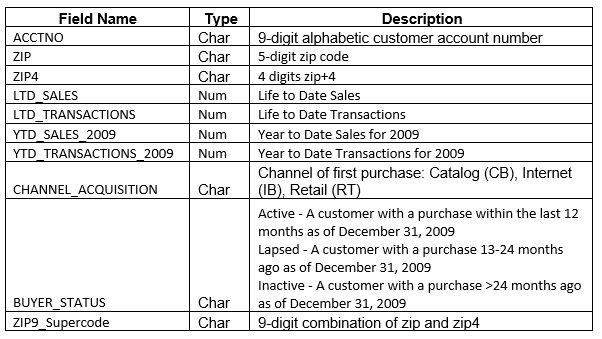

In [70]:
# first five records.
# notice that the first record has an index of 0 (zero offset)
xyzcust10.head(1)

,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_Supercode,ZIP9_SUPERCODE
0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,600845016


In [33]:
# last index is 30470 - which means there are how many records? Check out shape.
xyzcust10.shape
xyzcust10.tail()

(30471, 11)

,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_Supercode,ZIP9_SUPERCODE
30466,SYDQYLSWH,60098,3951,2736.0,9,96.0,1,RT,ACTIVE,600983951,600983951
30467,SAPDQHQLP,60098,9681,2412.0,8,108.0,1,RT,ACTIVE,600989681,600989681
30468,SASYAPDSY,60098,0,429.0,1,0.0,0,RT,INACTIVE,600983858,600983858
30469,PWQPDWHA,60098,7927,651.0,1,0.0,0,RT,INACTIVE,600987927,600987927
30470,SQQHDYHWH,60098,4160,4527.0,16,672.0,2,RT,ACTIVE,600984160,600984160


In [34]:
print(xyzcust10.sample(5))

          ACCTNO    ZIP  ZIP4  LTD_SALES  LTD_TRANSACTIONS  YTD_SALES_2009  \
12636  SGPASWASS  60073  8135      255.0                 2             0.0   
19981  GQDQPPDLS  60090  6020      900.0                 5           261.0   
22284  GSAYDWQYW  60067  3561      609.0                 2           345.0   
25195  GWAYPSPLY  60093  4206     3789.0                 7          1113.0   
14358  SGHLWSGYG  60073  9742      255.0                 2             0.0   

       YTD_TRANSACTIONS_2009 CHANNEL_ACQUISITION BUYER_STATUS  ZIP9_Supercode  \
12636                      0                  RT     INACTIVE       600738135   
19981                      2                  RT       ACTIVE       600906020   
22284                      1                  RT       ACTIVE       600673561   
25195                      2                  IB       ACTIVE       600934206   
14358                      0                  RT       LAPSED       600739742   

       ZIP9_SUPERCODE  
12636       60073813

In [35]:
# use your function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
test = xyzcust10[['LTD_TRANSACTIONS','YTD_TRANSACTIONS_2009']].apply(descrip)
test

,LTD_TRANSACTIONS,YTD_TRANSACTIONS_2009
min,1,0
max,194,36


<div class="alert alert-block alert-warning">
    
# Requirements :
The six homework requirements are listed below.  Show your code in the cells below. If you need more than one cell per answer, add cells where needed. <br>
<br>

Show all code. Even if you get an answer incorrect, you can receive partial credit for trying.
</div>

### Requirement 1 (5 points)

Create a dataframe with at least 3 different columns; 
Column values are your choice. Display your dataframe.

In [38]:
newdf = pd.DataFrame(columns = ['col1', 'col12', 'col3'])
newdf

,col1,col12,col3


### Requirement 2 (5 points)

Show a list of Zip values in xyzcust10 along with their frequency count

In [80]:
ZIP = list(xyzcust10['ZIP'])
uniqueZIP = list(set(ZIP))
uniquecount = [ZIP.count(i) for i in uniqueZIP]
freq = [[uniqueZIP[i], uniquecount[i]] for i in range(0, len(uniqueZIP))]
freq

[[0, 1],
 [60056, 1529],
 [60060, 1296],
 [60061, 1207],
 [60062, 3099],
 [60064, 42],
 [60065, 21],
 [60192, 2],
 [60067, 3050],
 [60068, 2781],
 [60069, 784],
 [60070, 463],
 [60071, 98],
 [60072, 34],
 [60073, 686],
 [60074, 1313],
 [60075, 5],
 [60076, 1090],
 [60077, 740],
 [60078, 25],
 [60079, 2],
 [60081, 322],
 [60082, 3],
 [60083, 344],
 [60084, 723],
 [60085, 379],
 [60087, 268],
 [60088, 28],
 [60089, 2007],
 [60090, 648],
 [60091, 3458],
 [60093, 3178],
 [60094, 4],
 [60095, 1],
 [60096, 125],
 [60097, 151],
 [60098, 564]]

### Requirement 3 (5 points)

Show how many active and inactive BUYER_STATUS is in xyzcust10

In [89]:
status = list(xyzcust10['BUYER_STATUS'])
uniquestatus = list(set(status))
uniquecount = [status.count(i) for i in uniquestatus]
statusfreq = [[uniquestatus[i], uniquecount[i]] for i in range(0, len(uniquestatus))]
statusfreq
print('There are 9,078 INACTIVE and 13,465 ACTIVE in BUYER_STATUS category')

[['INACTIVE', 9078], ['LAPSED', 7928], ['ACTIVE', 13465]]

There are 9,078 INACTIVE and 13,465 ACTIVE in BUYER_STATUS category


### Requirement 4 (5 points)

Of all the active customers, what is the count break down based upon the channel acquistion?

In [105]:
ACTIVEpeeps = xyzcust10[xyzcust10['BUYER_STATUS'] == 'ACTIVE']
CHANNEL = list(ACTIVEpeeps['CHANNEL_ACQUISITION'])
uniqueacq = list(set(CHANNEL))
uniquecount = [CHANNEL.count(i) for i in uniqueacq]
channelfreq = [[uniqueacq[i], uniquecount[i]] for i in range(0, len(uniqueacq))]
channelfreq
print('Channel acquistion is IB: 1,829, RT: 10,827 and CB: 809.')

[['IB', 1829], ['RT', 10827], ['CB', 809]]

Channel acquistion is IB: 1,829, RT: 10,827 and CB: 809.


### Requirement 5 (5 points)

List the top 10 'inactive' customers by life to date sales

In [116]:
INACTIVEpeeps = xyzcust10[xyzcust10['BUYER_STATUS'] == 'INACTIVE']
SORTED = INACTIVEpeeps.sort_values(by = 'LTD_SALES', ascending = False)
SORTED['LTD_SALES'].head(10)
print('List of TOP 10 are above')

11714    30696.0
5761     14946.0
15700    12078.0
28839    11529.0
13790    10455.0
11095    10095.0
9375      8889.0
5692      8745.0
12919     8661.0
6535      8598.0
Name: LTD_SALES, dtype: float64

List of TOP 10 are above


### Requirement 6 (5 points)

a) what is the max LTD_SALES? <br>
b) what is the total LTD_SALES? <br>
c) what is the total YTD_SALES_2009? <br>
d) how many customers have zero YTD_TRANSACTIONS_2009?

In [142]:
#part a
LTDSALES = list(xyzcust10['LTD_SALES'])
LTDSALES.sort()
LTDSALES[len(LTDSALES)-1]
print("a.) Max of LTD_SALES IS 2,247,750.")

print(" ")

#part b
LTDSALES = list(xyzcust10['LTD_SALES'])
sum(LTDSALES)
print('b.) The total LTD_SALES IS 38,977,281!')

print(" ")

#part c
YTDSALES = list(xyzcust10['YTD_SALES_2009'])
sum(YTDSALES)
print('c.) The total YTD_SALES_2009 IS 7,195,884!')

print(" ")

#part d
YTD_TRANSACTIONS = list(xyzcust10['YTD_TRANSACTIONS_2009'])
countedzero = YTD_TRANSACTIONS.count(0)
[0, countedzero]
print('d.) The number of customers have zero YTD_TRANSACTIONS_2009 are 17,006!')

2247750.0

a.) Max of LTD_SALES IS 2,247,750.
 


38977281.0

b.) The total LTD_SALES IS 38,977,281!
 


7195884.0

c.) The total YTD_SALES_2009 IS 7,195,884!
 


[0, 17006]

d.) The number of customers have zero YTD_TRANSACTIONS_2009 are 17,006!
